In [2]:
from pathlib import Path
import numpy as np
import torch
import cv2
import albumentations as A

from dataset.image_utils import *
from dataset.datasets import *
from dataloader import config, train_loader, val_loader
%reload_ext autoreload
%autoreload 2

In [17]:
A = iter(train_loader)
Batch = next(A)
Batch

{'image': tensor([[[[0.4471, 0.4510, 0.4549,  ..., 0.8588, 0.8627, 0.8627],
           [0.4588, 0.4588, 0.4627,  ..., 0.8549, 0.8706, 0.8784],
           [0.4784, 0.4784, 0.4784,  ..., 0.8471, 0.8824, 0.9020],
           ...,
           [0.7490, 0.7412, 0.7255,  ..., 0.8353, 0.8275, 0.8235],
           [0.7725, 0.7647, 0.7490,  ..., 0.8235, 0.8353, 0.8392],
           [0.7843, 0.7765, 0.7608,  ..., 0.8196, 0.8392, 0.8471]],
 
          [[0.3843, 0.3882, 0.4000,  ..., 0.8000, 0.8039, 0.8078],
           [0.3961, 0.4000, 0.4078,  ..., 0.7922, 0.8118, 0.8196],
           [0.4157, 0.4196, 0.4196,  ..., 0.7843, 0.8196, 0.8353],
           ...,
           [0.6588, 0.6588, 0.6549,  ..., 0.7765, 0.7647, 0.7608],
           [0.6784, 0.6745, 0.6706,  ..., 0.7647, 0.7725, 0.7765],
           [0.6902, 0.6863, 0.6784,  ..., 0.7608, 0.7804, 0.7882]],
 
          [[0.3333, 0.3373, 0.3490,  ..., 0.7294, 0.7333, 0.7373],
           [0.3451, 0.3529, 0.3608,  ..., 0.7294, 0.7451, 0.7529],
           [0.3

In [14]:
train_loader.batch_size

8

In [20]:
Batch["image"].shape

torch.Size([8, 3, 256, 256])

In [22]:
config.dataset

DatasetSettings(train_path=PosixPath('train'), val_path=PosixPath('val'), train_preprocessing_config=PosixPath('conf/train_preprocessing.yaml'), val_preprocessing_config=PosixPath('conf/val_preprocessing.yaml'), loader_num_workers=2, batch_size=8)

In [23]:
DATASET_DIR = Path('train')
CONFIG_FILENAME = 'conf/train_preprocessing.yaml'

In [24]:
dataset = ImageDirsDataset(images_dir=DATASET_DIR, preprocessing_config=CONFIG_FILENAME)
len(dataset)

20000

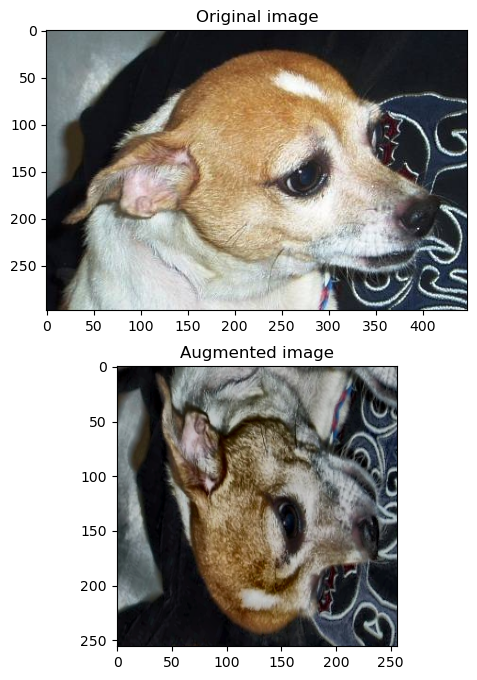

In [25]:
idx = np.random.randint(0, len(dataset))
sample = dataset[idx]

In [16]:
sample["label"]

0

In [17]:
sample["image"].max()

tensor(1.)

In [19]:
sample["image"].min()

tensor(0.1059)

In [20]:
sample["image"].shape

torch.Size([3, 256, 256])